In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import glob

In [5]:
import os
import glob
import cv2
import numpy as np

# 画像が保存されているフォルダのパス
folder_path_mask = '/home/data/0917/mask/'
folder_path_hida = '/home/data/0917/hida_maxfil/'
output_path = '/home/data/0917/shiitake_ratio.txt'

# ヘッダーを追加する関数
def add_header(file_path):
    header = 'tag,number\n'
    if not os.path.exists(file_path):
        with open(file_path, 'w') as file:
            file.write(header)
    else:
        with open(file_path, 'r') as file:
            lines = file.readlines()
        if lines[0].strip() != 'tag,number':
            lines.insert(0, header)
            with open(file_path, 'w') as file:
                file.writelines(lines)

# ヘッダーを追加
add_header(output_path)

def process_files(mask_path, hida_path, filename):
    base_filename = filename.split('_mask')[0]  # 'IMG_1329'の部分を取得
    matching_files = glob.glob(os.path.join(hida_path, base_filename + '*'))  # 'IMG_1329'で始まるファイルを検索
    if matching_files:  # 一致するファイルが存在するか確認
        img_path_mask = os.path.join(mask_path, filename)
        img_path_hida = matching_files[0]  # 最初の一致するファイルを使用
        img_mask = cv2.imread(img_path_mask, cv2.IMREAD_GRAYSCALE)
        img_hida = cv2.imread(img_path_hida, cv2.IMREAD_GRAYSCALE)
        # 2つの画像の白の画素数を数える
        white_mask = np.sum(img_mask == 255)
        white_hida = np.sum(img_hida == 255)
        # シイタケの割合を計算
        ratio = white_hida / white_mask
        # txtファイルに保存
        with open(output_path, 'a') as f:
            f.write(f'{base_filename},{ratio}\n')
    else:
        print(f"No matching file for {base_filename}")

# フォルダ内のすべてのファイルを一覧
for root, dirs, files in os.walk(folder_path_mask):
    for filename in files:
        mask_path = root
        hida_path = os.path.join(folder_path_hida, os.path.relpath(root, folder_path_mask))
        process_files(mask_path, hida_path, filename)

In [2]:
# #襞領域の画像とマスク画像から襞領域のシイタケに対する割合を計算する
# # 画像が保存されているフォルダのパス
# folder_path_mask = '/home/data/0917/mask/'
# folder_path_hida = '/home/data/0917/hida_maxfil/'
# output_path = '/home/data/0917/shiitake_ratio.txt'

# for foldername in os.listdir(folder_path_mask):
#     mask_path = os.path.join(folder_path_mask, foldername)
#     hida_path = os.path.join(folder_path_hida, foldername)
#     for filename in os.listdir(mask_path):
#         base_filename = filename.split('_mask')[0]  # 'IMG_1329'の部分を取得
#         matching_files = glob.glob(os.path.join(hida_path, base_filename + '*'))  # 'IMG_1329'で始まるファイルを検索
#         if matching_files:  # 一致するファイルが存在するか確認
#             img_path_mask = os.path.join(mask_path, filename)
#             img_path_hida = matching_files[0]  # 最初の一致するファイルを使用
#             img_mask = cv2.imread(img_path_mask, cv2.IMREAD_GRAYSCALE)
#             img_hida = cv2.imread(img_path_hida, cv2.IMREAD_GRAYSCALE)
#             # 2つの画像の白の画素数を数える
#             white_mask = np.sum(img_mask == 255)
#             white_hida = np.sum(img_hida == 255)
#             # シイタケの割合を計算
#             ratio = white_hida / white_mask
#             # txtファイルに保存
#             with open(os.path.join(output_path), 'a') as f:
#                 f.write(f'{base_filename},{ratio}\n')
#             # print(base_filename)
#         else:
#             # print(base_filename)
#             continue
            

NotADirectoryError: [Errno 20] Not a directory: '/home/data/0917/mask/IMG_1595.jpg'

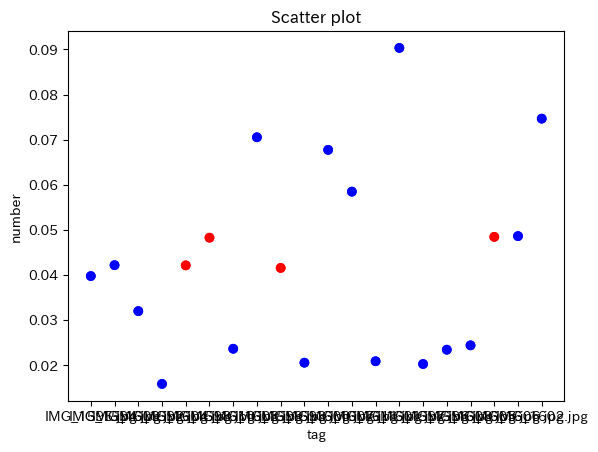

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# txtファイルを読み込む
df = pd.read_csv('/home/data/0917/shiitake_ratio.txt', sep=',')  
# 色を変えたいファイル名のリスト
special_files = [
    'IMG_1598.jpg',
    'IMG_1599.jpg',
    'IMG_1604.jpg',    
    'IMG_1605.jpg',
]

# 色を変えるための条件を設定
colors = ['red' if tag in special_files else 'blue' for tag in df['tag']]

# 散布図を作成する
plt.scatter(df['tag'], df['number'],c=colors)

# グラフのタイトルと軸ラベルを設定する
plt.title('Scatter plot')
plt.xlabel('tag')
plt.ylabel('number')

# グラフを表示する
plt.show()

Text(0, 0.5, 'Frequency')

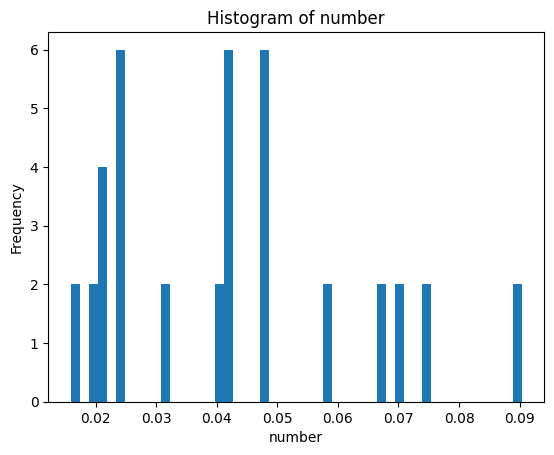

In [7]:
# txtファイルを読み込む
df = pd.read_csv('/home/data/0917/shiitake_ratio.txt', sep=',') 

# ヒストグラムを作成する
plt.hist(df['number'], bins=50)  # binsはヒストグラムの棒の数を指定します

# グラフのタイトルと軸ラベルを設定する
plt.title('Histogram of number')
plt.xlabel('number')
plt.ylabel('Frequency')

# グラフを表示

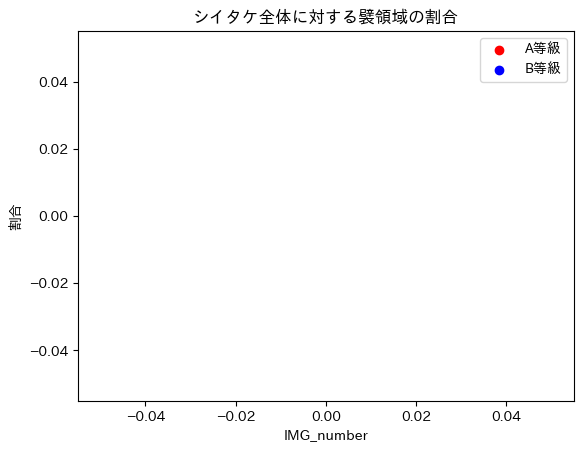

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib


# txtファイルを読み込む
df = pd.read_csv('/home/data/0917/shiitake_ratio.txt', sep=',') 

# 'tag'列から数字部分を抽出
df['tag_number'] = df['tag'].str.extract('(\d+)').astype(int)

# A_low = 1321  # 下限
# A_high = 1367  # 上限
# B_low = 1266
# B_high = 1315
# CD_low = 1129
# CD_high = 1259

A_low = 1492  # 下限
A_high = 1492  # 上限
B_low = 1484
B_high = 1491


# 特定の範囲の値を持つ行を抽出
df1 = df[(df['tag_number'] >= A_low) & (df['tag_number'] <= A_high)] 
df2 = df[(df['tag_number'] >= B_low) & (df['tag_number'] <= B_high)] 
# df3 = df[(df['tag_number'] >= CD_low) & (df['tag_number'] <= CD_high)]
# df4 = df[(df['tag_number'] < CD_low) | (df['tag_number'] > A_high)]

A_max = df1['number'].max()
B_min = df2['number'].nsmallest(2).max()

# 散布図を作成する
plt.scatter(df1.index, df1['number'], color='red',label='A等級')  # 特定の範囲の値を持つ点を赤色でプロット
plt.scatter(df2.index, df2['number'], color='blue',label='B等級')  
# plt.scatter(df3.index, df3['number'], color='green')  
# plt.scatter(df4.index, df4['number'], color='yellow')  

# x軸方向に点線を描く
plt.axhline(y=A_max, color='red', linestyle='dashed')
plt.axhline(y=B_min, color='blue', linestyle='dashed')
plt.axhline(y=(A_max+B_min)/2, color='gray', linestyle='dashed')

# グラフのタイトルと軸ラベルを設定する
plt.title('シイタケ全体に対する襞領域の割合')
plt.xlabel('IMG_number')
plt.ylabel('割合')

plt.legend()

# グラフを表示する
plt.show()




In [ ]:
# 数直線上にデータを表示する
plt.plot(df1['number'], [0]*len(df1), 'ro', ms=6,label='A等級')  # 'ro'は赤色の丸を、msはマーカーサイズを指定
plt.plot(df2['number'], [0]*len(df2), 'bo', ms=4,label='B等級')  # 'bo'は青色の丸を指定
plt.plot(df4['number'], [0]*len(df4), 'yo', ms=5)  # 'yo'は黄色の丸を指定

# グラフのタイトルと軸ラベルを設定する
plt.title('シイタケ全体に対する襞領域の割合')
plt.xlabel('割合')
plt.yticks([])  # y軸の目盛りを非表示にする
plt.legend(loc = 'upper left')
# グラフを表示する
plt.show()

In [ ]:
# 各グループでnumberが最も小さいものと最も大きいもののtagを抽出
min_max_tags = {
    'A': {
        'min': df.loc[df1['number'].idxmin(), 'tag'],
        'max': df.loc[df1['number'].idxmax(), 'tag']
    },
    'B': {
        'min': df.loc[df2['number'].idxmin(), 'tag'],
        'max': df.loc[df2['number'].idxmax(), 'tag']
    },
    'CD': {
        'min': df.loc[df3['number'].idxmin(), 'tag'],
        'max': df.loc[df3['number'].idxmax(), 'tag']
    }
}

print(min_max_tags)

In [ ]:
# Bグループの最小値から2つのnumberとそれらに対応するtagを取得
two_smallest_B = df2.nsmallest(2, 'number')[['number', 'tag']]
print(two_smallest_B)

In [ ]:
number_value = df[df['tag'] == 'IMG_1321']['number'].values[0]
print(number_value)

In [ ]:
# 'ratio'列でソートし、その結果を表示する
df2_sorted = df2.sort_values(by='number')
# print(df2_sorted[['tag', 'number']])

# 'number'が0.2以下の行を表示する
df2_filtered = df2_sorted[df2_sorted['number'] <= 0.02]
print(df2_filtered[['tag', 'number']])

In [ ]:
# 箱ひげ図を作成する
plt.figure()
plt.boxplot([df1['number'], df2['number']], labels=['A等級', 'B等級'])
plt.title('シイタケ全体に対する襞領域の割合')
plt.xlabel('等級')
plt.ylabel('割合')
plt.show()